<a href="https://colab.research.google.com/github/ajiepamungkasep/Twitter-Sentiment-Analysis/blob/main/Labeling%20%26%20Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk

Labeling Sentiment

In [9]:
lexicon_positive = pd.read_csv('lexicon_positive.csv')
lexicon_positive

,hai,3
0,merekam,2
1,ekstensif,3
2,paripurna,1
3,detail,2
4,pernik,3
...,...,...
3591,melarikan,3
3592,vakansi,3
3593,spesial,4
3594,asrama,3


In [10]:
lexicon_negative = pd.read_csv('lexicon_negative.csv')
lexicon_negative

,putus tali gantung,-2
0,gelebah,-2
1,gobar hati,-2
2,tersentuh (perasaan),-1
3,isak,-5
4,larat hati,-3
...,...,...
6593,kantong kering,-4
6594,penggaruk,-3
6595,senewen,-4
6596,menetapkan,-5


In [11]:
df = pd.read_csv('polisi_preprocessed.csv')

for i, text in enumerate(df['text_preprocessed']):
    df['text_preprocessed'][i] = df['text_preprocessed'][i].replace("'", "")\
                                            .replace(',','').replace(']','').replace('[','')
    list_words=[]
    for word in df['text_preprocessed'][i].split():
        list_words.append(word)
        
    df['text_preprocessed'][i] = list_words   
    

In [12]:
lexicon_positive = dict()
import csv
with open('lexicon_positive.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
import csv
with open('lexicon_negative.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])

In [13]:
def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:
    score = 0
    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
    polarity=''
    if (score > 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'
    else:
        polarity = 'neutral'
    return score, polarity

In [14]:
results = df['text_preprocessed'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
df['polarity_score'] = results[0]
df['polarity'] = results[1]
print(df['polarity'].value_counts())
df
# Export to csv file
# tweets.to_csv(r'25k_tweets_data_clean_polarity.csv', index = False, header = True,index_label=None)



negative    709
positive    194
neutral      90
Name: polarity, dtype: int64


,Unnamed: 0,Unnamed: 0.1,text,text_clean,text_preprocessed,polarity_score,polarity
0,0,0,@fadlizon Pak bukannya DPR juga menganggarkan ...,pak bukannya dpr menganggarkan gas air mata te...,"[pak, bukan, dpr, anggar, gas, air, mata, sebu...",-6,negative
1,1,1,@txtdrberseragam KNP JADI POLISI ANJG 😭,jadi polisi anjing 😭,"[jadi, polisi, anjing]",-5,negative
2,2,2,Jumlah anggota Polri yang diperiksa terkait Tr...,jumlah anggota polri diperiksa terkait tragedi...,"[jumlah, anggota, polri, periksa, kait, traged...",-17,negative
3,3,3,Gduwe doyo maneh gae menghakimi polisi yaallah...,gduwe doyo kamu gae menghakimi polisi yaallah ...,"[gduwe, doyo, kamu, gae, hakim, polisi, yaalla...",-4,negative
4,4,4,Padahal orang tua nya di bunuh polisi https://...,padahal orang tua nya bunuh polisi,"[padahal, orang, tua, nya, bunuh, polisi]",-9,negative
...,...,...,...,...,...,...,...
988,988,988,Polisi sibuk bikin video humanis,polisi sibuk membuat video humanis,"[polisi, sibuk, buat, video, humanis]",-2,negative
989,989,989,"Najwa Shihab akan Laporkan Kepada Polisi, Niki...",najwa shihab laporkan polisi nikita mirzani ej...,"[najwa, shihab, lapor, polisi, nikita, mirzani...",-5,negative
990,990,990,"Tiba di Malang, Kapolri Jenguk Korban Tragedi ...",tiba malang kapolri jenguk korban tragedi kanj...,"[tiba, malang, kapolri, jenguk, korban, traged...",-29,negative
991,991,991,Retweet &amp; Follow Biar Ga Hilang\n--\nKolek...,retweet amp; follow tidak hilang -- koleksi ci...,"[retweet, amp, follow, tidak, hilang, --, kole...",-5,negative


In [15]:
df.to_csv('labeling.csv')

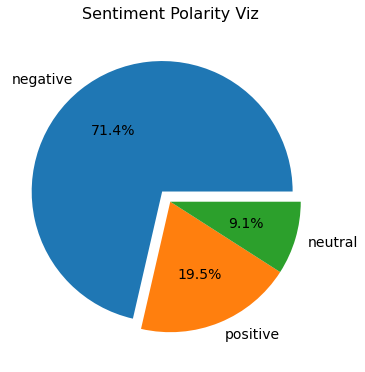

In [16]:
fig, ax = plt.subplots(figsize = (6, 6))
sizes = [count for count in df['polarity'].value_counts()]
labels = list(df['polarity'].value_counts().index)
explode = (0.1, 0, 0)
ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 14})
ax.set_title('Sentiment Polarity Viz', fontsize = 16, pad = 20)
plt.show()

Wordcloud

<function matplotlib.pyplot.show(*args, **kw)>

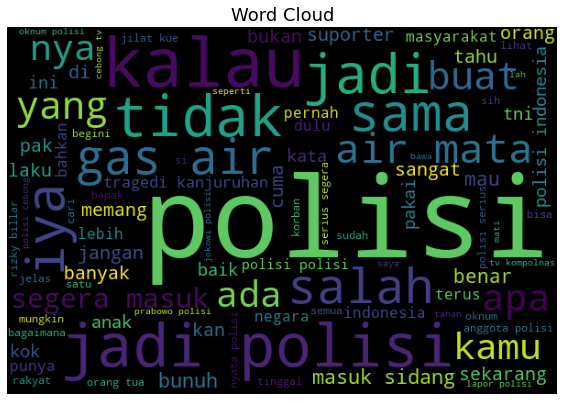

In [17]:
list_words=''
for text_clean in df['text_preprocessed']:
    for word in text_clean:
        list_words += ' '+(word)

wordcloud = WordCloud(width = 600, height = 400, background_color = 'black', min_font_size = 10).generate(list_words)
fig, ax = plt.subplots(figsize = (8, 6))
ax.set_title('Word Cloud', fontsize = 18)
ax.grid(False)
ax.imshow(wordcloud)
fig.tight_layout(pad=0)
ax.axis('off')
plt.show

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [20]:
df['text_preprocessed'] = df['text_preprocessed'].astype(str)
vec = CountVectorizer().fit(df['text_preprocessed'])
vec_transform = vec.transform(df['text_preprocessed'])
print(vec_transform)

  (0, 41)	1
  (0, 120)	1
  (0, 443)	1
  (0, 450)	1
  (0, 716)	1
  (0, 827)	1
  (0, 1203)	1
  (0, 1609)	1
  (0, 1980)	1
  (0, 2142)	1
  (0, 2428)	1
  (1, 130)	1
  (1, 1076)	1
  (1, 2142)	1
  (2, 121)	3
  (2, 950)	1
  (2, 1159)	2
  (2, 1179)	1
  (2, 1206)	1
  (2, 1308)	1
  (2, 2072)	2
  (2, 2158)	2
  (2, 2703)	1
  (2, 2876)	1
  (3, 715)	1
  :	:
  (991, 103)	1
  (991, 158)	1
  (991, 399)	1
  (991, 530)	1
  (991, 793)	1
  (991, 942)	1
  (991, 1206)	1
  (991, 1332)	1
  (991, 1576)	1
  (991, 1583)	1
  (991, 2011)	1
  (991, 2142)	1
  (991, 2175)	1
  (991, 2304)	1
  (991, 2823)	1
  (991, 3049)	1
  (992, 338)	1
  (992, 947)	1
  (992, 972)	1
  (992, 1133)	1
  (992, 1391)	1
  (992, 2142)	1
  (992, 2540)	1
  (992, 2858)	1
  (992, 2978)	1


In [44]:
x = vec_transform.toarray()
y = df['polarity']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y)

In [45]:
y_train.value_counts(normalize=True)

negative    0.714106
positive    0.195214
neutral     0.090680
Name: polarity, dtype: float64

In [46]:
y_test.value_counts(normalize=True)

negative    0.713568
positive    0.195980
neutral     0.090452
Name: polarity, dtype: float64

In [47]:
BN = MultinomialNB().fit(x_train, y_train)
predictNB = BN.predict(x_test)
print('NB :', BN.score(x_test, y_test))

NB : 0.7236180904522613
